In [388]:
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

# configure notebook for plotting
%matplotlib inline 
mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# define default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')

In [389]:
ddir = '/Users/eleanor/Downloads/universe_2/'
topstars = pd.read_csv(ddir+'Top/Star_Data.csv') 
print(topstars.keys())

Index(['Name', 'X', 'Y', 'BlueF', 'GreenF', 'RedF', 'Parallax',
       'RadialVelocity', 'Variable?'],
      dtype='object')


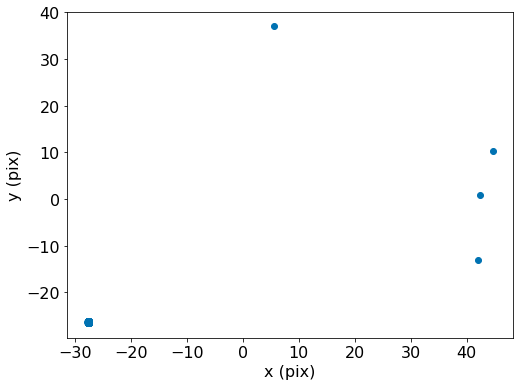

In [390]:
plt.scatter(topstars.X,topstars.Y)
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

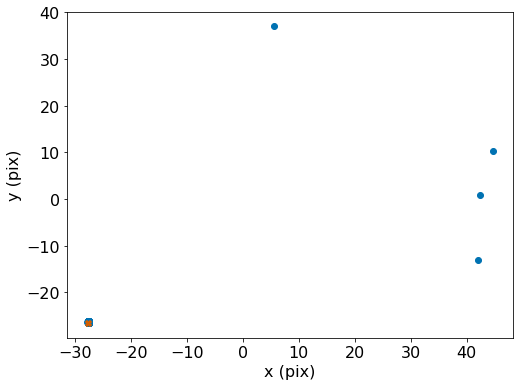

In [391]:
centre = (-27.7, -26.5) #this is only cluster in the top data the others are single
plt.scatter(topstars.X,topstars.Y)
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

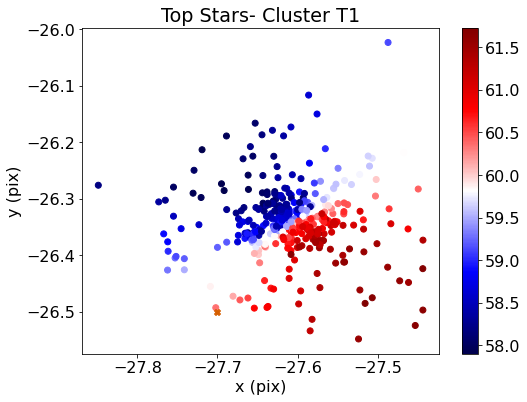

In [392]:
d = np.sqrt((topstars.X-centre[0])** 2 + (topstars.Y - centre[1])**2)
galaxyt1 = topstars[d<1] # filter to only close ones
plt.scatter(galaxyt1.X,galaxyt1.Y,c=galaxyt1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster T1');

In [393]:
##HR DIAGRAM
m0, m1, m2 = (np.log10(galaxyt1['BlueF']), 
              np.log10(galaxyt1['GreenF']), 
              np.log10(galaxyt1['RedF'])) 
colour = m2-m0

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

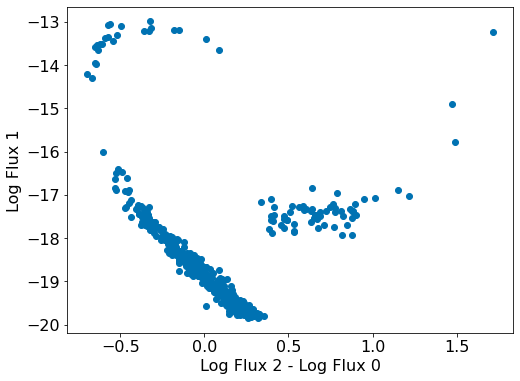

In [394]:
st1 = plt.scatter(colour,m1)
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

In [395]:
import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

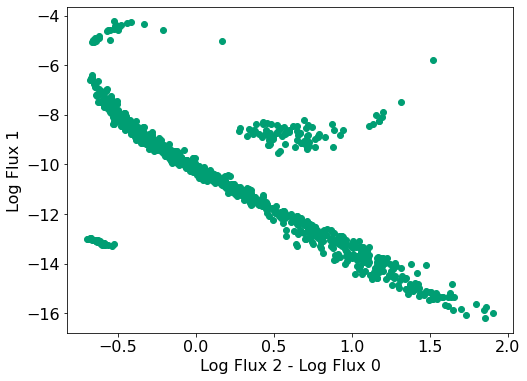

In [396]:
fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

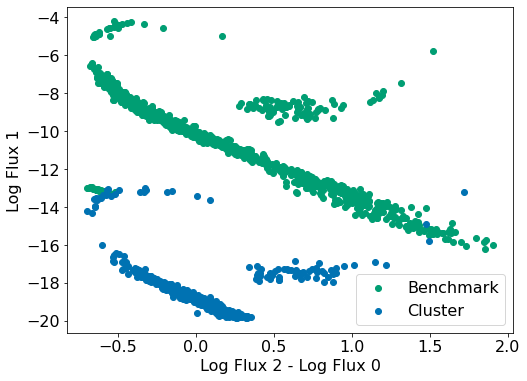

In [397]:
fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

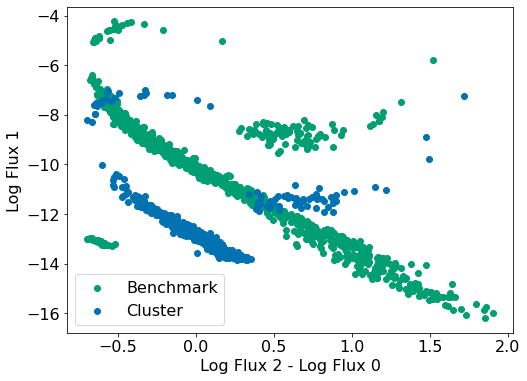

In [398]:
fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

In [399]:
10**(3)

1000

In [400]:
#BOTTOM
ddir = '/Users/eleanor/Downloads/universe_2/'
bottomstars = pd.read_csv(ddir+'Bottom/Star_Data.csv') 
#print(bottomstars.keys())

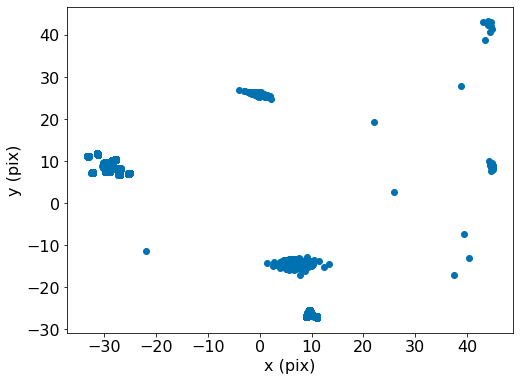

In [401]:
plt.scatter(bottomstars.X,bottomstars.Y)
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

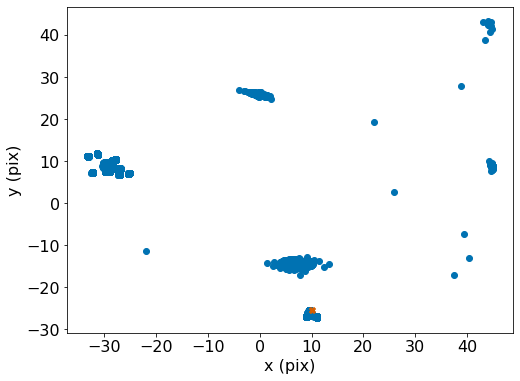

In [402]:
centre = (10, -25.5) #this is only cluster in the top data the others are single
plt.scatter(bottomstars.X,bottomstars.Y)
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

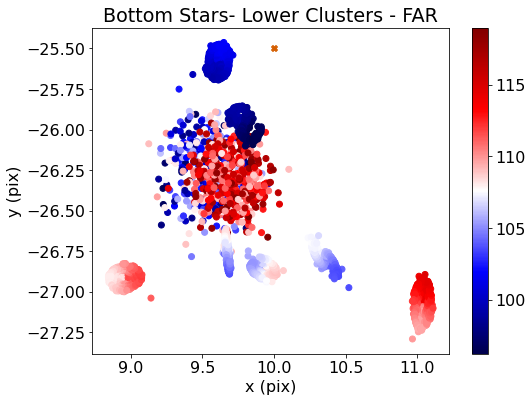

In [403]:
centre = (10, -25.5)
d = np.sqrt((bottomstars.X-centre[0])** 2 + (bottomstars.Y - centre[1])**2)
galaxy = bottomstars[d<3] # filter to only close ones LOOK AT WHAT THIS DOES?
plt.scatter(galaxy.X,galaxy.Y,c=galaxy.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Bottom Stars- Lower Clusters - FAR');

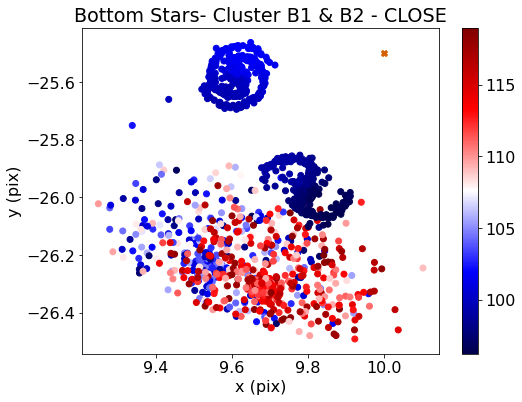

In [404]:
centre = (10, -25.5)
d = np.sqrt((bottomstars.X-centre[0])** 2 + (bottomstars.Y - centre[1])**2)
galaxy = bottomstars[d<1] # filter to only close ones LOOK AT WHAT THIS DOES?
plt.scatter(galaxy.X,galaxy.Y,c=galaxy.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Bottom Stars- Cluster B1 & B2 - CLOSE');

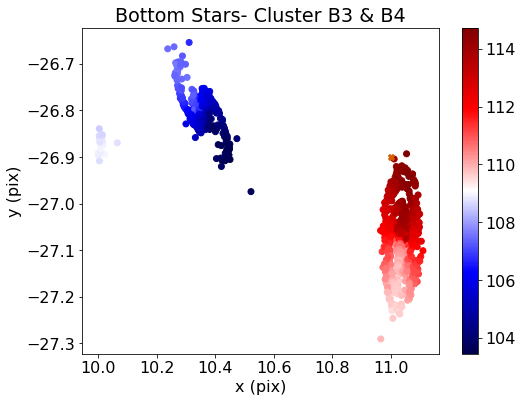

In [405]:
centre = (11, -26.9)
d = np.sqrt((bottomstars.X-centre[0])** 2 + (bottomstars.Y - centre[1])**2)
galaxy = bottomstars[d<1] # filter to only close ones LOOK AT WHAT THIS DOES?
plt.scatter(galaxy.X,galaxy.Y,c=galaxy.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Bottom Stars- Cluster B3 & B4'); ##RHS of far out graph

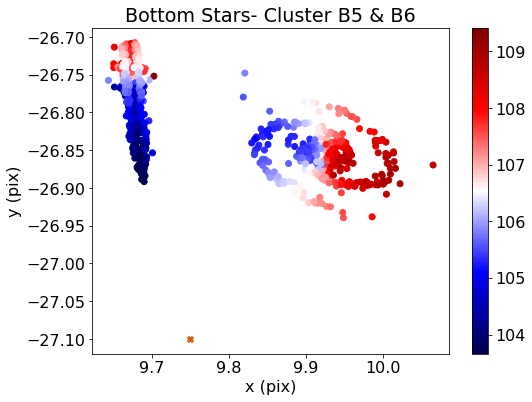

In [406]:
centre = (9.75, -27.1)
d = np.sqrt((bottomstars.X-centre[0])** 2 + (bottomstars.Y - centre[1])**2)
galaxy = bottomstars[d<0.4] # filter to only close ones LOOK AT WHAT THIS DOES?
plt.scatter(galaxy.X,galaxy.Y,c=galaxy.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Bottom Stars- Cluster B5 & B6'); ##RHS of far out graph

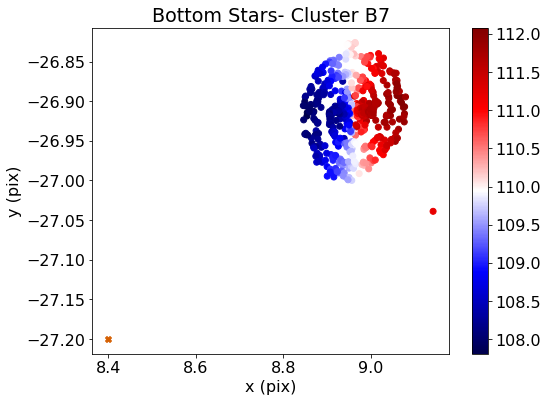

In [407]:
centre = (8.4, -27.2)
d = np.sqrt((bottomstars.X-centre[0])** 2 + (bottomstars.Y - centre[1])**2)
galaxyb7 = bottomstars[d<1] # filter to only close ones LOOK AT WHAT THIS DOES?
plt.scatter(galaxyb7.X,galaxyb7.Y,c=galaxyb7.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Bottom Stars- Cluster B7'); ##RHS of far out graph

In [408]:
##HR DIAGRAM
m0, m1, m2 = (np.log10(galaxyb7['BlueF']), 
              np.log10(galaxyb7['GreenF']), 
              np.log10(galaxyb7['RedF'])) 
colour = m2-m0

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

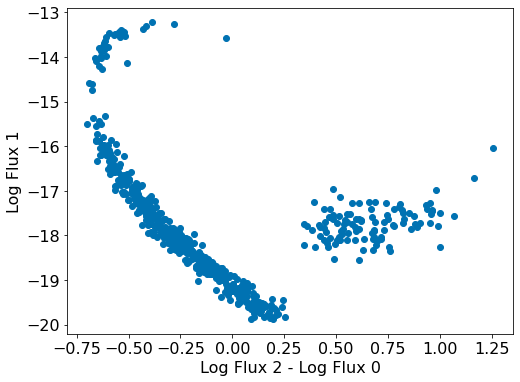

In [409]:
sb7 = plt.scatter(colour,m1)
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

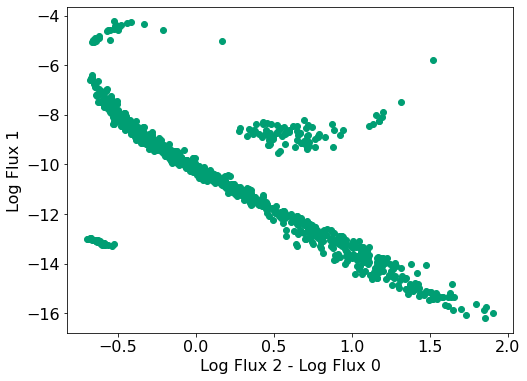

In [410]:
fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

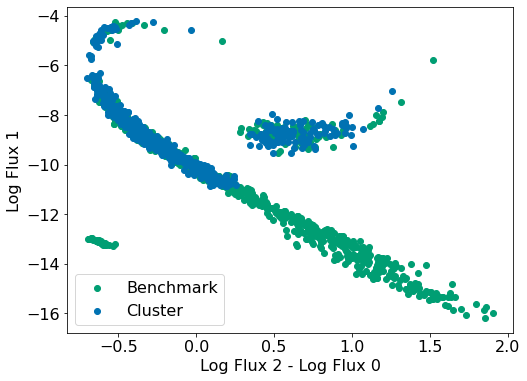

In [411]:
fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+9,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

In [412]:
10**(9/2)

31622.776601683792

In [413]:
#RIGHT
ddir = '/Users/eleanor/Downloads/universe_2/'
rightstars = pd.read_csv(ddir+'Right/Star_Data.csv') 
#print(rightstars.keys())

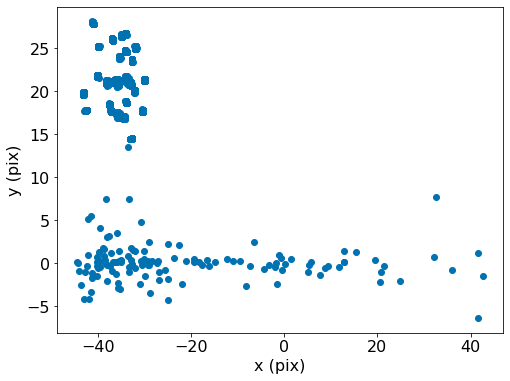

In [414]:
plt.scatter(rightstars.X,rightstars.Y)
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

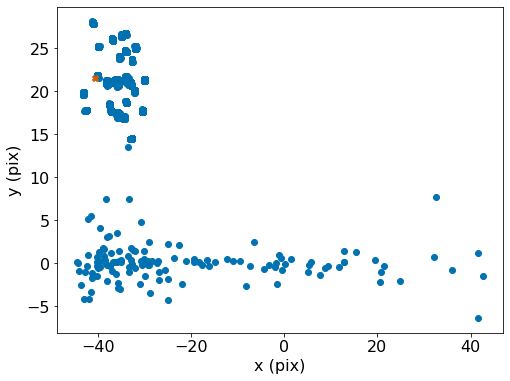

In [415]:
centre = (-40.5, 21.5) 
plt.scatter(rightstars.X,rightstars.Y)
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

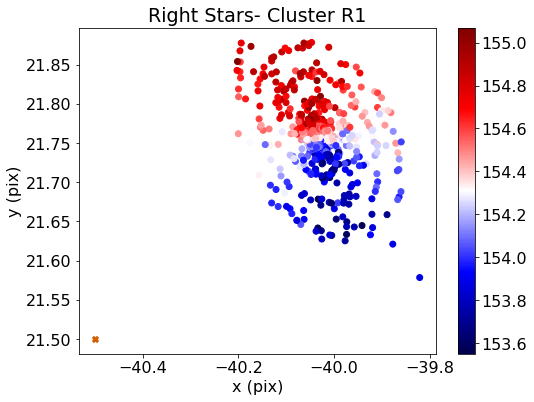

In [416]:
centre = (-40.5,21.5)
d = np.sqrt((rightstars.X-centre[0])** 2 + (rightstars.Y - centre[1])**2)
galaxyr1 = rightstars[d<2] # filter to only close ones LOOK AT WHAT THIS DOES?
plt.scatter(galaxyr1.X,galaxyr1.Y,c=galaxyr1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Right Stars- Cluster R1');

In [417]:
##HR DIAGRAM
m0, m1, m2 = (np.log10(galaxyr1['BlueF']), 
              np.log10(galaxyr1['GreenF']), 
              np.log10(galaxyr1['RedF'])) 
colour = m2-m0

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

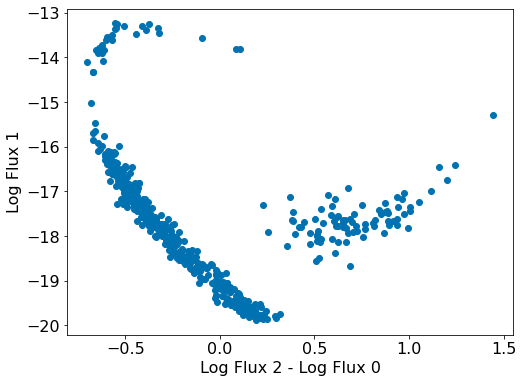

In [418]:
sr1 = plt.scatter(colour,m1)
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

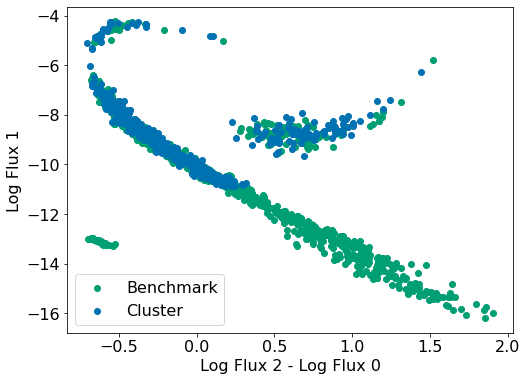

In [419]:
fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+9,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

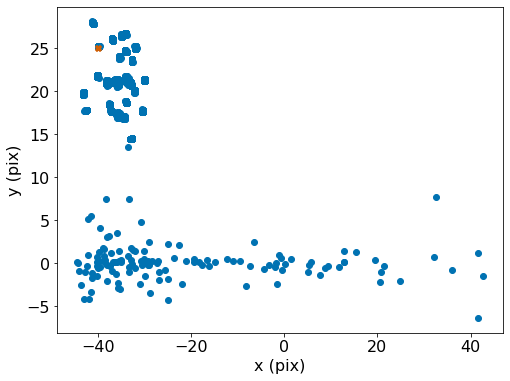

In [420]:
centre = (-40, 25) 
plt.scatter(rightstars.X,rightstars.Y)
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

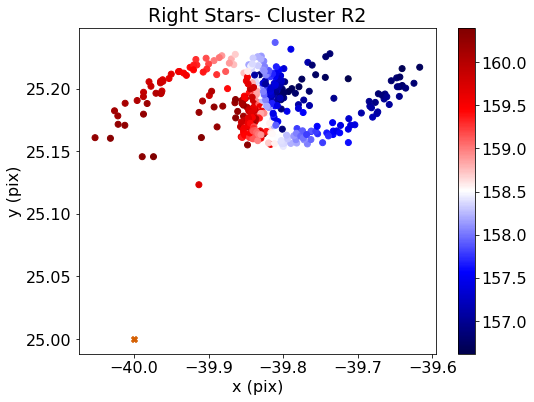

In [421]:
centre = (-40,25)
d = np.sqrt((rightstars.X-centre[0])** 2 + (rightstars.Y - centre[1])**2)
galaxyr2 = rightstars[d<2] # filter to only close ones LOOK AT WHAT THIS DOES?
plt.scatter(galaxyr2.X,galaxyr2.Y,c=galaxyr2.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Right Stars- Cluster R2');

In [422]:
##HR DIAGRAM
m0, m1, m2 = (np.log10(galaxyb7['BlueF']), 
              np.log10(galaxyb7['GreenF']), 
              np.log10(galaxyb7['RedF'])) 
colour = m2-m0

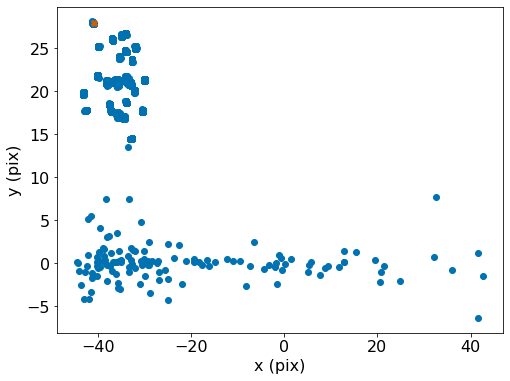

In [423]:
centre = (-40.7, 28) 
plt.scatter(rightstars.X,rightstars.Y)
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

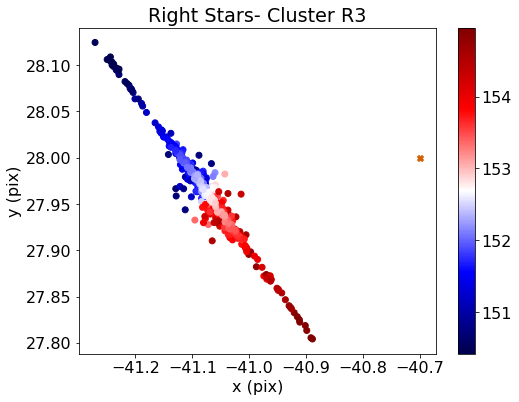

In [424]:
centre = (-40.7,28)
d = np.sqrt((rightstars.X-centre[0])** 2 + (rightstars.Y - centre[1])**2)
galaxy = rightstars[d<2] # filter to only close ones LOOK AT WHAT THIS DOES?
plt.scatter(galaxy.X,galaxy.Y,c=galaxy.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Right Stars- Cluster R3');

In [425]:
#LEFT
ddir = '/Users/eleanor/Downloads/universe_2/'
leftstars = pd.read_csv(ddir+'Left/Star_Data.csv') 
#print(leftstars.keys())

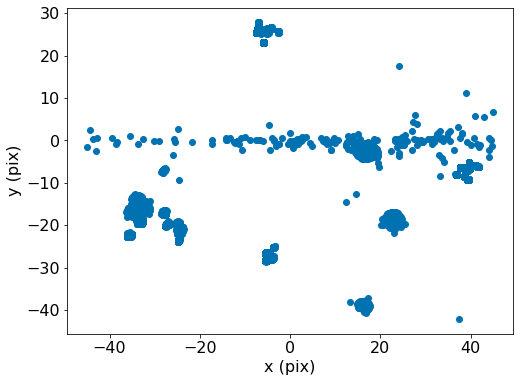

In [426]:
plt.scatter(leftstars.X,leftstars.Y)
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

In [427]:
#BCAK
ddir = '/Users/eleanor/Downloads/universe_2/'
backstars = pd.read_csv(ddir+'Back/Star_Data.csv') 
#print(backstars.keys())

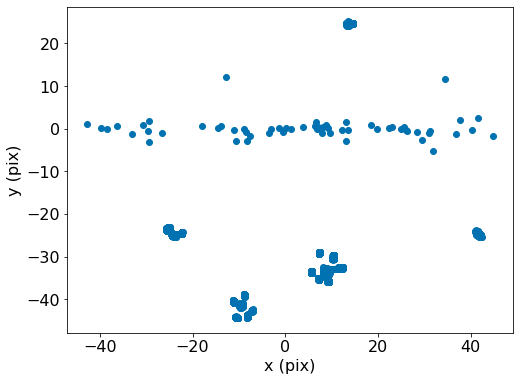

In [428]:
plt.scatter(backstars.X,backstars.Y)
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

In [429]:
#FRONT
ddir = '/Users/eleanor/Downloads/universe_2/'
frontstars = pd.read_csv(ddir+'Front/Star_Data.csv') 
#print(frontstars.keys())

In [430]:
frontstars

,Name,X,Y,BlueF,GreenF,RedF,Parallax,RadialVelocity,Variable?
0,FrontS017194,-16.4877,-5.1256,1.805000e-20,2.381000e-20,2.958000e-20,0.001,112.59,0
1,FrontS017196,-16.5251,-5.0938,6.846000e-19,1.080000e-18,1.998000e-18,-0.000,114.91,0
2,FrontS017199,-16.5721,-5.0673,5.460000e-19,9.027000e-19,1.786000e-18,-0.000,116.00,0
3,FrontS017201,-16.5232,-5.1021,3.826000e-20,4.301000e-20,3.970000e-20,-0.000,114.39,0
4,FrontS017202,-16.5710,-5.1027,4.266000e-20,4.881000e-20,4.708000e-20,-0.000,115.28,0
...,...,...,...,...,...,...,...,...,...
23028,FrontS169536,22.1723,-0.0234,5.432000e-16,7.942000e-16,1.302000e-15,0.013,1.26,0
23029,FrontS169538,18.2204,0.1697,1.276000e-09,1.633000e-09,1.874000e-09,0.013,1.07,0
23030,FrontS169540,19.8780,-0.5791,3.279000e-16,4.884000e-16,7.992000e-16,0.012,1.13,0
23031,FrontS169544,9.9576,0.7614,7.014000e-15,7.970000e-15,7.286000e-15,0.011,0.60,0


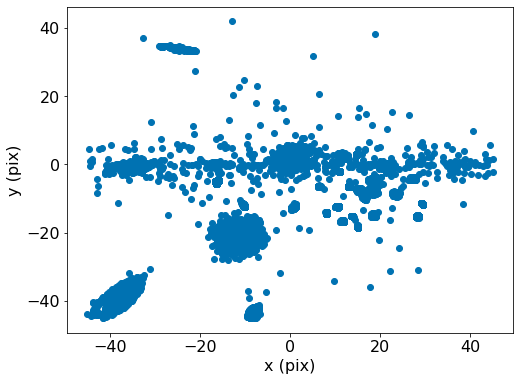

In [431]:
plt.scatter(frontstars.X,frontstars.Y)
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

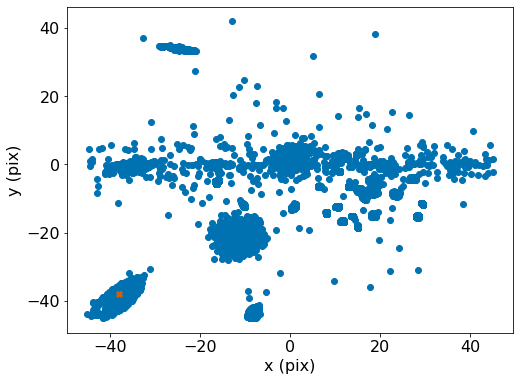

In [432]:
centre = (-38, -38) 
plt.scatter(frontstars.X,frontstars.Y)
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

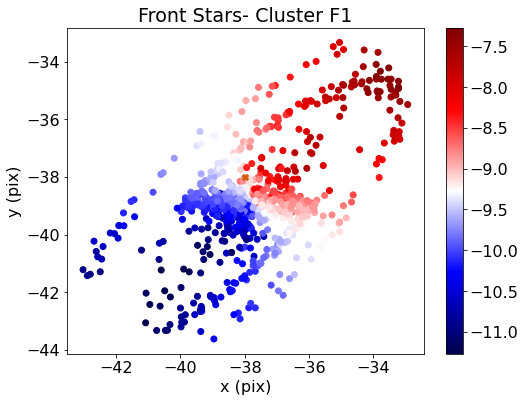

In [433]:
centre = (-38,-38)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf1 = frontstars[d<6] # filter to only close ones LOOK AT WHAT THIS DOES?
plt.scatter(galaxyf1.X,galaxyf1.Y,c=galaxyf1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Front Stars- Cluster F1');

In [434]:
##HR DIAGRAM
m0, m1, m2 = (np.log10(galaxyf1['BlueF']), 
              np.log10(galaxyf1['GreenF']), 
              np.log10(galaxyf1['RedF'])) 
colour = m2-m0

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

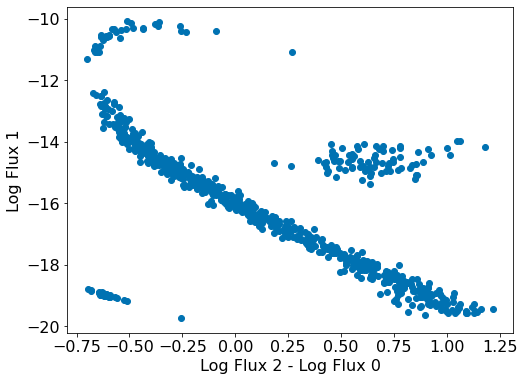

In [435]:
sf1 = plt.scatter(colour,m1)
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

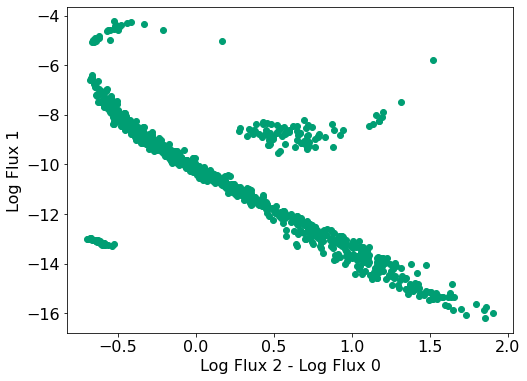

In [436]:
fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

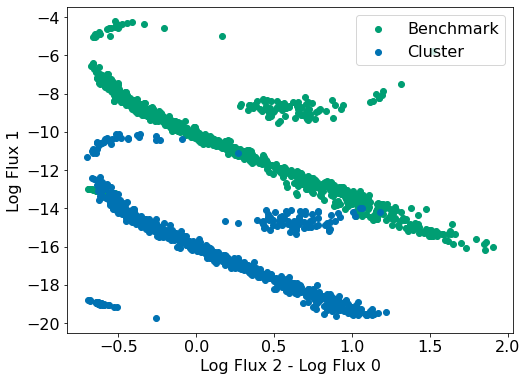

In [437]:
fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

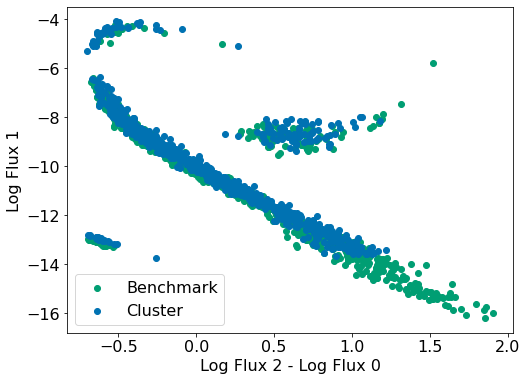

In [438]:
fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

In [439]:
10**(9.1/2)

35481.33892335753